Data Analysis using ydata

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("network_traffic_strings.csv")
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

C:\Users\Brett\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Brett\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Convert String Features to Float using OneHotEncoder

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('network_traffic.csv')

# Define which features are categorical
categorical_features = ['protocol_type', 'service', 'flag']

# Create a column transformer to apply one-hot encoding only to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep non-categorical features as they are
)

# Create a pipeline with the column transformer
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
result = pipeline.fit_transform(df)

# Convert the result to a DataFrame for better readability
result_df = pd.DataFrame(result)
print(result_df.head())


    0    1    2    3    4    5    6    7    8    9   ...   35   36   37   38  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 45 columns]


Random Forrest model with feature ranking

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('network_traffic.csv')

# Display the first few rows of the DataFrame to inspect the data
print(data.head())

# Prepare the data
X = data.drop('is_intrusion', axis=1)  
y = data['is_intrusion']

# Train & test split creation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)


   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              0        0     0        302        896     0   
1         0              0        0     0        339       1588     0   
2         0              0        0     0        260       7334     0   
3         0              0        0     0        213       8679     0   
4         0              0        0     0        308       1658     0   

   wrong_fragment  urgent  hot  ...  root_shell  su_attempted  num_root  \
0               0       0    0  ...           0             0         0   
1               0       0    0  ...           0             0         0   
2               0       0    0  ...           0             0         0   
3               0       0    0  ...           0             0         0   
4               0       0    0  ...           0             0         0   

   num_file_creations  num_shells  num_access_files  num_outbound_cmds  \
0                   0           0   

Wrapper Method - Backward and Forward Stepwise Regression

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df = pd.read_csv('network_traffic.csv')

#Split the data into features and target
X = df.drop('is_intrusion', axis=1)  # Replace 'target_variable_column' with the actual column name
y = df['is_intrusion']

#Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Backward Stepwise Regression
def backward_stepwise_selection(X, y):
    cols = list(X.columns)
    p_values = [1]  # initialize with a p-value that will be higher than your significance level
    while len(cols) > 1:
        X_1 = X[cols]
        model = sm.OLS(y, X_1).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > 0.05:
            remove_feature = p_values.idxmax()
            cols.remove(remove_feature)
        else:
            break
    selected_features = cols
    return selected_features

backward_selected_features = backward_stepwise_selection(X_train, y_train)

print("backward features")
print(backward_selected_features)


#Forward Stepwise Regression
def forward_stepwise_selection(X, y):
    selected_features = []
    while len(selected_features) < len(X.columns):
        remaining_features = list(set(X.columns) - set(selected_features))
        p_values = []
        for feature in remaining_features:
            X_temp = X[selected_features + [feature]]
            model = sm.OLS(y, sm.add_constant(X_temp)).fit()
            p_value = model.pvalues[feature]
            p_values.append(p_value)
        best_feature = remaining_features[p_values.index(min(p_values))]
        selected_features.append(best_feature)
    return selected_features

forward_selected_features = forward_stepwise_selection(X_train, y_train)

print("forward features")
print(forward_selected_features)


backward features
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'hot', 'logged_in', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']
forward features
['flag', 'src_bytes', 'is_host_login', 'is_guest_login', 'service', 'hot', 'logged_in', 'duration', 'root_shell', 'num_file_creations', 'num_shells', 'land', 'wrong_fragment', 'num_outbound_cmds', 'dst_bytes', 'urgent', 'protocol_type', 'num_compromised', 'num_root', 'su_attempted', 'num_access_files', 'num_failed_logins']


Filter Method using correlation statistics

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              0        0     0        302        896     0   
1         0              0        0     0        339       1588     0   
2         0              0        0     0        260       7334     0   
3         0              0        0     0        213       8679     0   
4         0              0        0     0        308       1658     0   

   wrong_fragment  urgent  hot  ...  root_shell  su_attempted  num_root  \
0               0       0    0  ...           0             0         0   
1               0       0    0  ...           0             0         0   
2               0       0    0  ...           0             0         0   
3               0       0    0  ...           0             0         0   
4               0       0    0  ...           0             0         0   

   num_file_creations  num_shells  num_access_files  num_outbound_cmds  \
0                   0           0   

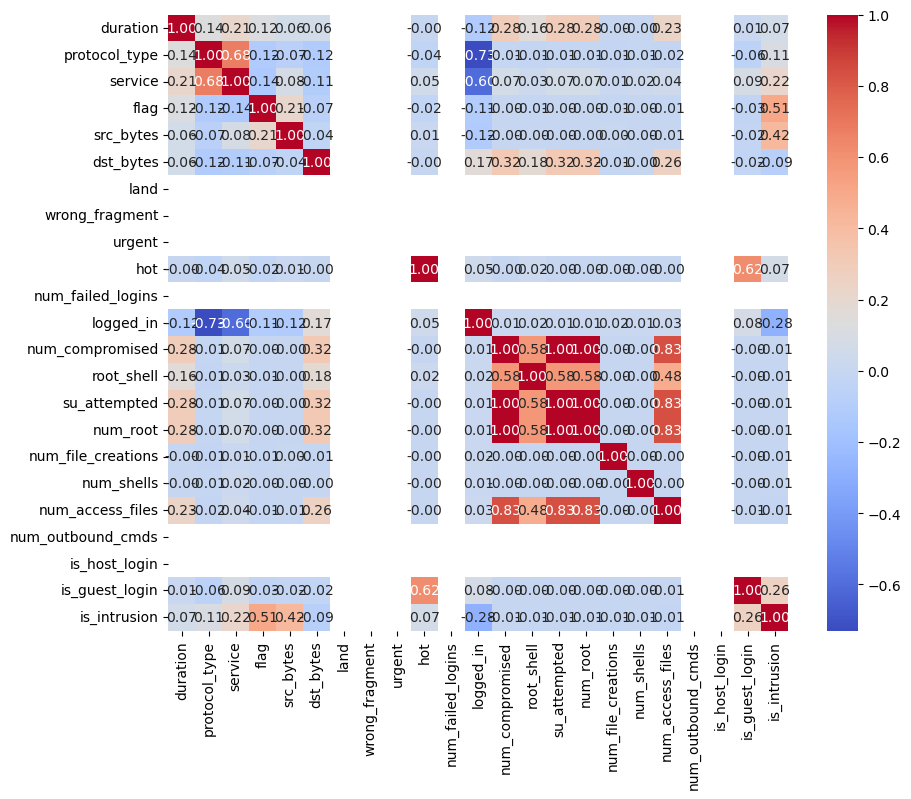

In [3]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('network_traffic.csv')

# Display the first few rows of the DataFrame to understand the data
print(df.head())

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of each feature with the target variable 
correlation_with_target = correlation_matrix['is_intrusion']

# Sort the features based on their absolute correlation with the target variable
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Display the sorted features and their correlation values
print(sorted_features)

# Optionally, you can plot a heatmap of the correlation matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Embedded Method: Lasso Regression

duration              0.0
protocol_type         0.0
service               0.0
flag                  0.0
src_bytes             0.0
dst_bytes            -0.0
land                  0.0
wrong_fragment        0.0
urgent                0.0
hot                   0.0
num_failed_logins     0.0
logged_in            -0.0
num_compromised      -0.0
root_shell           -0.0
su_attempted         -0.0
num_root             -0.0
num_file_creations   -0.0
num_shells           -0.0
num_access_files     -0.0
num_outbound_cmds     0.0
is_host_login         0.0
is_guest_login        0.0
dtype: float64


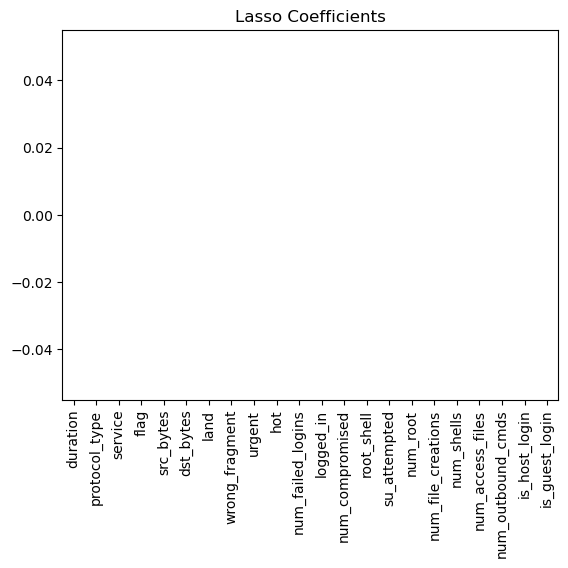

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('network_traffic.csv')

# Separate features (X) and target variable (y)
X = data.drop('is_intrusion', axis=1)
y = data['is_intrusion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for different levels of regularization

# Fit the model on the training data
lasso_model.fit(X_train_scaled, y_train)

# Get the coefficients of the features
coefficients = pd.Series(lasso_model.coef_, index=X.columns)

# Print the coefficients
print(coefficients)

# Plot the coefficients
coefficients.plot(kind='bar')
plt.title('Lasso Coefficients')
plt.show()


Embedded Method: Random Forest with Feature Importance Ranking

               Feature  Importance
3                 flag    0.314809
2              service    0.278723
4            src_bytes    0.166851
0             duration    0.138138
5            dst_bytes    0.097668
1        protocol_type    0.001184
11           logged_in    0.000980
21      is_guest_login    0.000852
12     num_compromised    0.000370
9                  hot    0.000300
15            num_root    0.000125
7       wrong_fragment    0.000000
8               urgent    0.000000
10   num_failed_logins    0.000000
6                 land    0.000000
13          root_shell    0.000000
14        su_attempted    0.000000
16  num_file_creations    0.000000
17          num_shells    0.000000
18    num_access_files    0.000000
19   num_outbound_cmds    0.000000
20       is_host_login    0.000000


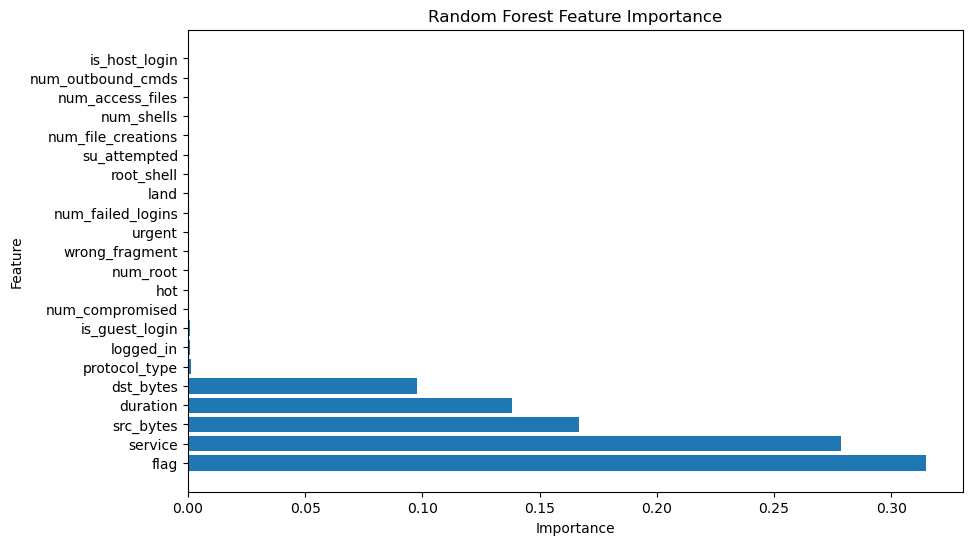

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('network_traffic.csv')

# Separate features (X) and target variable (y)
X = df.drop('is_intrusion', axis=1)
y = df['is_intrusion']

# Create a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


Fit Naive Bayes model with 10-Fold Cross-Validation

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, accuracy_score

# Load the dataset
data = pd.read_csv('network_traffic.csv')

# Extract the features and target
X = data.drop('is_intrusion', axis=1)
y = data['is_intrusion']

# Initialize the Naive Bayes model
naive_bayes = GaussianNB()

# Create a 10-fold cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and store the results
auc_scores = cross_val_score(naive_bayes, X, y, cv=cv, scoring='roc_auc')
accuracy_scores = cross_val_score(naive_bayes, X, y, cv=cv, scoring='accuracy')

# Calculate the mean AUC and Accuracy
mean_auc = auc_scores.mean()
mean_accuracy = accuracy_scores.mean()

print("Mean AUC:", mean_auc)
print("Mean Accuracy:", mean_accuracy)


Mean AUC: 0.9022654320987653
Mean Accuracy: 0.5913333333333334


Fit Logistic Regression model with 10-Fold Cross-Validation

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the Dataset
data = pd.read_csv('network_traffic.csv')

# Convert 'type' to binary (0 for 'low' and 1 for 'high')
#le = LabelEncoder()
#data['type'] = le.fit_transform(data['type'])

# Select the predictor variables (X) and the target variable (y)
X = data.drop('is_intrusion', axis=1)
y = data['is_intrusion']

model = LogisticRegression()

# Perform 10-fold cross-validation
auc_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
accuracy_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Calculate the mean AUC and Accuracy across the 10 folds
mean_auc = auc_scores.mean()
mean_accuracy = accuracy_scores.mean()

print("Mean AUC:", mean_auc)
print("Mean Accuracy:", mean_accuracy)


C:\Users\Brett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Brett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean AUC: 0.899104938271605
Mean Accuracy: 0.9283333333333331


C:\Users\Brett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Brett\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fit Decision Tree model with 10-Fold Cross-Validation

In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('network_traffic.csv')

# Encode the 'type' column
#le = LabelEncoder()
#data['type'] = le.fit_transform(data['type'])

# Split the data into features (X) and the target variable (y)
X = data.drop('is_intrusion', axis=1)
y = data['is_intrusion']

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform 10-fold cross-validation and calculate AUC and Accuracy
auc_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='roc_auc')
accuracy_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

mean_auc = auc_scores.mean()
mean_accuracy = accuracy_scores.mean()

print(f"Mean AUC: {mean_auc}")
print(f"Mean Accuracy: {mean_accuracy}")


Mean AUC: 0.9908024691358024
Mean Accuracy: 0.9536666666666667


Fit SVM model with 10-Fold Cross-Validation

In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('network_traffic.csv')

# Select the columns you mentioned
#selected_columns = ['citric acid', 'sulphates', 'alcohol']

# Extract features and target variable
X = data.drop('is_intrusion', axis=1)
y = data['is_intrusion']

# Encode the 'type' column to numeric values ('low' as 0, 'high' as 1)
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)

# Create an SVM classifier
svm_classifier = SVC(probability=True)

# Perform 10-fold cross-validation
scores = cross_val_score(svm_classifier, X, y, cv=10, scoring='accuracy')
auc_scores = cross_val_score(svm_classifier, X, y, cv=10, scoring='roc_auc')

# Calculate the mean AUC and Accuracy scores
mean_auc = auc_scores.mean()
mean_accuracy = scores.mean()

print(f'Mean AUC: {mean_auc}')
print(f'Mean Accuracy: {mean_accuracy}')


Mean AUC: 0.8513024691358024
Mean Accuracy: 0.9293333333333333


In [ ]:
Fit Random Forrest model with 10-Fold Cross-Validation

In [5]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('network_traffic.csv')

# Extract features and target variable
X = data.drop('is_intrusion', axis=1)
y = data['is_intrusion']

# Encode the 'type' column since it's categorical
#le = LabelEncoder()
#y = le.fit_transform(y)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation
cv_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Calculate the mean AUC and Accuracy from cross-validation
mean_auc = cv_auc.mean()
mean_accuracy = cv_accuracy.mean()

print("Mean AUC:", mean_auc)
print("Mean Accuracy:", mean_accuracy)



Mean AUC: 0.9941604938271604
Mean Accuracy: 0.9536666666666667


Plot ROC Curve Random Forrest

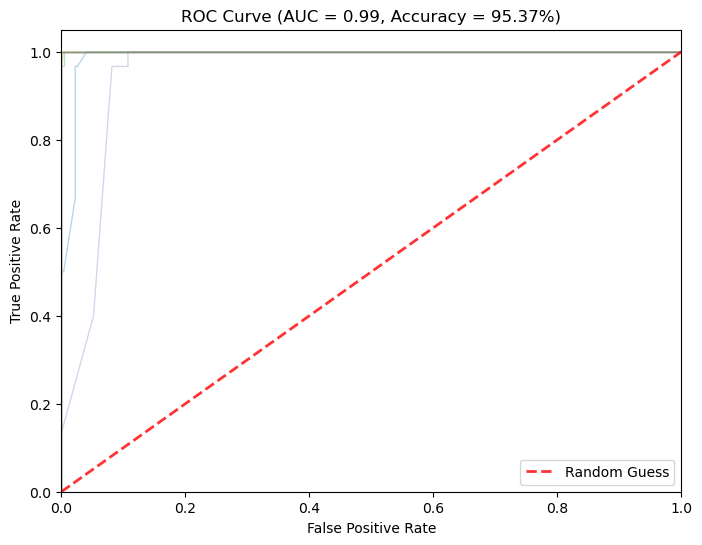

In [8]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('network_traffic.csv')

# Extract features and target variable
X = data.drop('is_intrusion', axis=1)
y = data['is_intrusion']

# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
cv = StratifiedKFold(n_splits=10)

auc_scores = []
accuracy_scores = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(8, 6))

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    auc_scores.append(roc_auc)
    accuracy = accuracy_score(y_test, (y_pred_prob > 0.5).astype(int))
    accuracy_scores.append(accuracy)

    plt.plot(fpr, tpr, lw=1, alpha=0.3)

# Calculate the mean AUC and accuracy
mean_auc = np.mean(auc_scores)
mean_accuracy = np.mean(accuracy_scores)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guess', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {mean_auc:.2f}, Accuracy = {mean_accuracy:.2%})')
plt.legend(loc='lower right')
plt.show()
